In [1]:
#!unzip '/content/drive/MyDrive/projects/Crop-Price-Correlation/Onion-Price-Volume-Analysis-main.zip' -d '/content/drive/MyDrive/projects/Crop-Price-Correlation'

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages

import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline

In [3]:
# read onion data into pandas dataframe
onion_df = pd.DataFrame()
for file in os.listdir('/content/drive/MyDrive/projects/Crop-Price-Correlation/Onion-Price-Volume-Analysis-main/Onion_Data'):
    df = pd.read_csv(os.path.join('/content/drive/MyDrive/projects/Crop-Price-Correlation/Onion-Price-Volume-Analysis-main/Onion_Data', file))
    onion_df = pd.concat([onion_df, df], axis = 0)

In [4]:
# display the head of the dataframe
onion_df.head()

,State Name,District Name,Market Name,Variety,Group,Arrivals (Tonnes),Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Reported Date
0,Uttar Pradesh,Varanasi,Varanasi(Grain),Nasik,Vegetables,3700.0,460.0,510.0,480.0,02 Aug 2002
1,Uttar Pradesh,Varanasi,Varanasi(Grain),Nasik,Vegetables,3000.0,465.0,510.0,490.0,03 Aug 2002
2,Uttar Pradesh,Varanasi,Varanasi(Grain),Nasik,Vegetables,2200.0,475.0,510.0,500.0,05 Aug 2002
3,Uttar Pradesh,Varanasi,Varanasi(Grain),Nasik,Vegetables,2500.0,490.0,520.0,510.0,07 Aug 2002
4,Uttar Pradesh,Ghaziabad,Ghaziabad,Red,Vegetables,10.0,380.0,450.0,420.0,08 Aug 2002


In [5]:
# check the shape of the dataframe
onion_df.shape

(467313, 10)

In [6]:
# get basic information about the dataframe
onion_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 467313 entries, 0 to 4575
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State Name                 467313 non-null  object 
 1   District Name              467313 non-null  object 
 2   Market Name                467313 non-null  object 
 3   Variety                    467313 non-null  object 
 4   Group                      467313 non-null  object 
 5   Arrivals (Tonnes)          467313 non-null  float64
 6   Min Price (Rs./Quintal)    467313 non-null  float64
 7   Max Price (Rs./Quintal)    467313 non-null  float64
 8   Modal Price (Rs./Quintal)  467313 non-null  float64
 9   Reported Date              467313 non-null  object 
dtypes: float64(4), object(6)
memory usage: 39.2+ MB


In [7]:
# get basic statistics about the dataset
onion_df.describe()

,Arrivals (Tonnes),Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal)
count,467313.000000,467313.000000,467313.000000,467313.000000
mean,29.255432,1029.001690,1121.646705,1364.006994
std,237.842652,1023.759498,1081.676479,940.936959
min,0.010000,0.000000,0.000000,0.000000
25%,2.400000,0.000000,310.000000,760.000000
50%,7.000000,850.000000,950.000000,1100.000000
75%,21.000000,1400.000000,1500.000000,1600.000000
max,84870.000000,10500.000000,46000.000000,10540.000000


In [8]:
# check the unique values in Group column
onion_df.Group.unique()

array(['Vegetables'], dtype=object)

In [9]:
# drop the Group and State Name columns
onion_df.drop(['Group', 'State Name'], axis = 1, inplace = True)
onion_df.head()

,District Name,Market Name,Variety,Arrivals (Tonnes),Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Reported Date
0,Varanasi,Varanasi(Grain),Nasik,3700.0,460.0,510.0,480.0,02 Aug 2002
1,Varanasi,Varanasi(Grain),Nasik,3000.0,465.0,510.0,490.0,03 Aug 2002
2,Varanasi,Varanasi(Grain),Nasik,2200.0,475.0,510.0,500.0,05 Aug 2002
3,Varanasi,Varanasi(Grain),Nasik,2500.0,490.0,520.0,510.0,07 Aug 2002
4,Ghaziabad,Ghaziabad,Red,10.0,380.0,450.0,420.0,08 Aug 2002


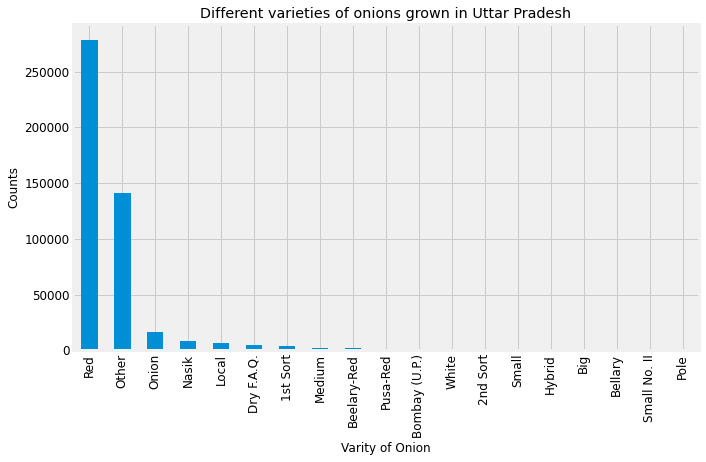

In [10]:
# plot the number on unique values present in the Variety column
onion_df.Variety.value_counts().plot(kind = 'bar', figsize = (10, 6), xlabel = 'Varity of Onion', ylabel = 'Counts',
                                     title = 'Different varieties of onions grown in Uttar Pradesh', fontsize = 12);

In [11]:
# convert date column into datetime object
onion_df['Reported Date'] = pd.to_datetime(onion_df['Reported Date'], errors='coerce')

In [12]:
onion_df=onion_df.sort_values(by='Reported Date')

In [13]:
onion_df.drop_duplicates('Reported Date', inplace = True)

In [14]:
onion_df.head(20)

,District Name,Market Name,Variety,Arrivals (Tonnes),Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Reported Date
49,Ghaziabad,Ghaziabad,Red,6.5,215.0,215.0,215.0,2002-06-12
50,Ghaziabad,Ghaziabad,Red,12.0,320.0,320.0,320.0,2002-06-26
51,Ghaziabad,Ghaziabad,Red,45.0,320.0,330.0,325.0,2002-06-27
42,Ghaziabad,Ghaziabad,Red,44.0,325.0,350.0,340.0,2002-07-03
43,Ghaziabad,Ghaziabad,Red,38.0,280.0,330.0,310.0,2002-07-05
44,Ghaziabad,Ghaziabad,Red,50.0,300.0,350.0,330.0,2002-07-15
45,Varanasi,Varanasi(Grain),Nasik,3700.0,460.0,500.0,475.0,2002-07-16
46,Ghaziabad,Ghaziabad,Red,42.0,300.0,380.0,360.0,2002-07-19
47,Ghaziabad,Ghaziabad,Red,35.0,380.0,400.0,390.0,2002-07-22
48,Ghaziabad,Ghaziabad,Red,29.0,380.0,410.0,395.0,2002-07-25


In [15]:
# list of districts in Uttar Pradesh
districts = ['Varanasi', 'Ghaziabad', 'Lucknow', 'Bareilly', 'Shahjahanpur', 'Kanpur', 'Ballia', 'Gorakhpur', 'Jhansi', 'Unnao',
             'Lakhimpur', 'Muzaffarnagar', 'Bulandshahar', 'Mainpuri', 'Rampur', 'Firozabad', 'Jaunpur', 'Bahraich', 'Agra', 
             'Jyotiba Phule Nagar', 'Baghpat', 'Basti', 'Muradabad', 'Faizabad', 'Sitapur', 'Sultanpur', 'Etah', 'Meerut', 
             'Pillibhit', 'Badaun', 'Azamgarh', 'Bijnor', 'Raebarelli', 'Deoria', 'Farukhabad', 'Ghazipur', 'Lalitpur', 
             'Etawah', 'Barabanki', 'Allahabad', 'Aligarh', 'Pratapgarh', 'Hathras', 'Mathura', 'Mirzapur', 'Saharanpur', 
             'Chandauli', 'Jalaun (Orai)', 'Mahoba', 'Auraiya', 'Gonda', 'Hamirpur', 'Chitrakut', 'Banda', 'Mau(Maunathbhanjan)', 
             'Maharajganj', 'Padrauna(Kusinagar)', 'Siddharth Nagar', 'Hardoi', 'Bhadohi(Sant Ravi Nagar)', 'Fatehpur', 
             'Sonbhadra', 'Gautam Budh Nagar', 'Kannuj', 'Khiri (Lakhimpur)', 'Balrampur', 'Sant Kabir Nagar', 'Ambedkarnagar', 
             'Shravasti', 'Kaushambi']

In [16]:
#saving the preprocessed data to onion.csv
onion_df.to_csv("/content/drive/MyDrive/projects/Crop-Price-Correlation/Onion-Price-Volume-Analysis-main/onion.csv", sep=',')

In [17]:
#limiting the columns to "fields" and creating another dataframe for analysis
fields = ['Modal Price (Rs./Quintal)', 'Reported Date']
analysis_df= pd.read_csv("/content/drive/MyDrive/projects/Crop-Price-Correlation/Onion-Price-Volume-Analysis-main/onion.csv",skipinitialspace=True, usecols=fields)
analysis_df['Reported Date'] = pd.to_datetime(analysis_df['Reported Date'], errors='coerce')
analysis_df = analysis_df.set_index('Reported Date')
analysis_df.head(2)

,Modal Price (Rs./Quintal)
Reported Date,
2002-06-12,215.0
2002-06-26,320.0


In [18]:
#Save a copy of the data to y in order to avoid blunders in the main dataframe
y = analysis_df.copy()

In [19]:
y.head()

,Modal Price (Rs./Quintal)
Reported Date,
2002-06-12,215.0
2002-06-26,320.0
2002-06-27,325.0
2002-07-03,340.0
2002-07-05,310.0


In [20]:
# The 'MS' string groups the data in buckets by start of the month
y = y['Modal Price (Rs./Quintal)'].resample('MS').mean()
# The term bfill means that we use the value before filling in missing values
y = y.fillna(y.bfill())
y

Reported Date
2002-06-01     286.666667
2002-07-01     371.428571
2002-08-01     483.260870
2002-09-01     654.354839
2002-10-01     654.354839
                 ...     
2020-09-01    1823.333333
2020-10-01    3183.709677
2020-11-01    3709.833333
2020-12-01    2700.000000
2021-01-01    2259.677419
Freq: MS, Name: Modal Price (Rs./Quintal), Length: 224, dtype: float64

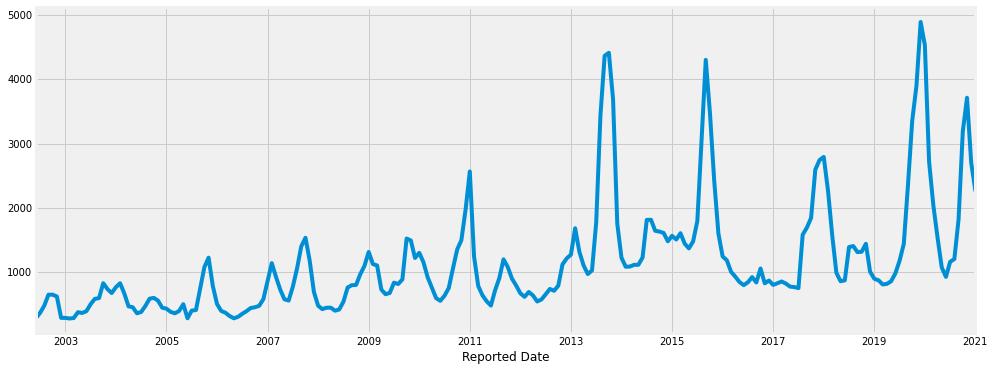

In [21]:
y.plot(figsize=(15, 6))
plt.show()

In [22]:
#!pip install pmdarima

In [43]:
#The output from the code determine whether the series is stationary or not and we need to make it a stationary series first.
from statsmodels.tsa.stattools import adfuller
X = y.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.801496
p-value: 0.058060
Critical Values:
	1%: -3.461
	5%: -2.875
	10%: -2.574


######The more negative this statistic, the more likely we are to reject the null hypothesis, i.e. time series is non-stationary.

p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

#####This implies that the time series is non-stationary.

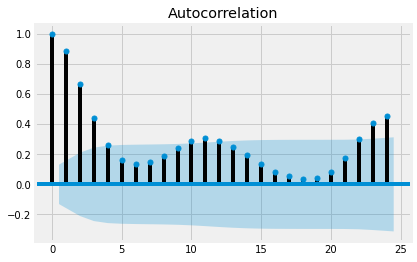

In [41]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(y)
pyplot.show()

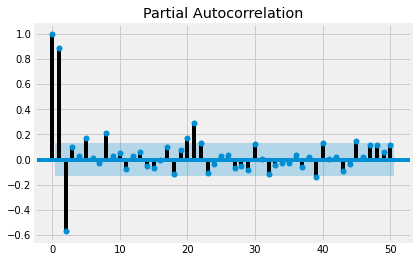

In [42]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(y, lags=50)
pyplot.show()

####ARIMA Modelling:

In [24]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [25]:
for param in pdq:
  for param_seasonal in seasonal_pdq:
    try:
      mod = sm.tsa.statespace.SARIMAX(y,
                                      order=param,
                                      seasonal_order=param_seasonal,
                                      enforce_stationarity=False,
                                      enforce_invertibility=False)

      results = mod.fit()
      print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
    except:
      continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:3879.410302336551
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:3613.5520961719503
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:3516.336489485232
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:3222.859934899926
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:3518.563393674308
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:3379.7562372636617
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:3199.995009429512
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:3186.2270449785774
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:3601.579577100345
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:3357.398774098828
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:3290.196567372099
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:3011.508255245705
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:3302.699449373473
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:3164.602423927566
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:3025.0918177273443
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2997.083711914265
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:3294.4679093171508
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:3128.7830457280497
ARIM

In [26]:
#Trying the same thing using auto-arima
import pmdarima as pmd
arima_model = pmd.auto_arima(y, 
                            start_p= 0, d = 1, start_q= 0,
                            test="adf", supress_warnings = True,
                            trace=True)
 
#Summary of the model
arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3310.231, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3255.648, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3242.710, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3308.340, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3242.890, Time=0.17 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3242.640, Time=0.18 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=3244.507, Time=0.24 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=3240.690, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=3240.767, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=3224.078, Time=0.23 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=3240.934, Time=0.09 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=3209.224, Time=0.26 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=3

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  224
Model:               SARIMAX(2, 1, 1)   Log Likelihood               -1599.987
Date:                Fri, 12 Mar 2021   AIC                           3207.975
Time:                        19:33:57   BIC                           3221.603
Sample:                             0   HQIC                          3213.476
                                - 224                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3428      0.040     33.557      0.000       1.264       1.421
ar.L2         -0.5968      0.031    -19.223      0.000      -0.658      -0.536
ma.L1         -0.9476      0.029    -32.426      0.000      -1.005      -0.890
sigma2      9.916e+04   5072.997     19.546      0.000    8.92e+04    1.09e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):               251.35
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):              10.04   Skew:                             0.43
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

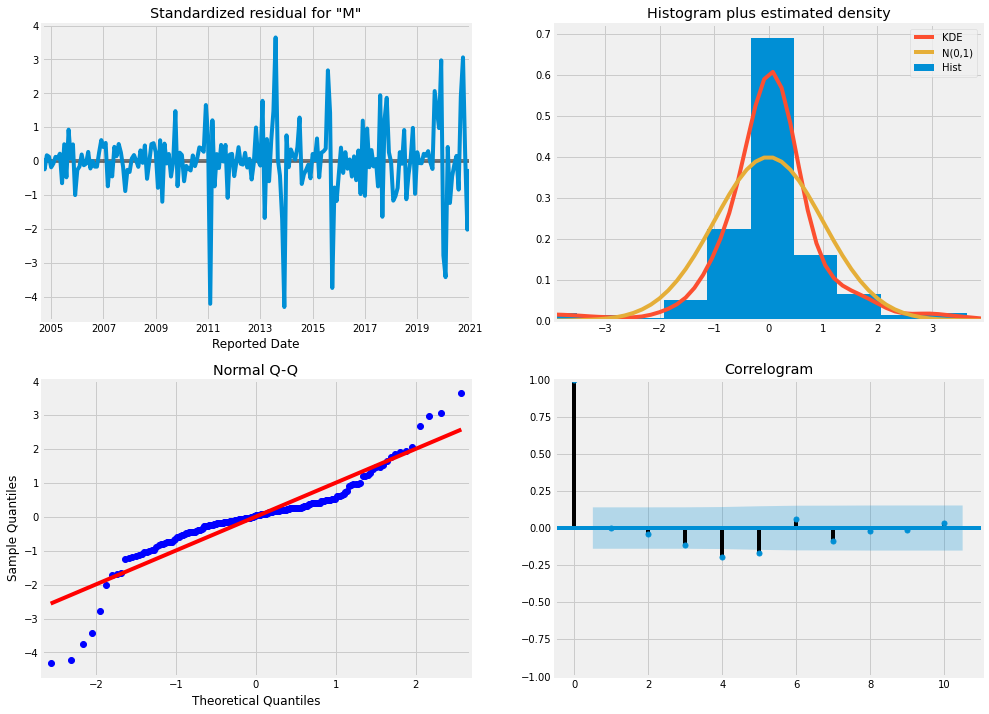

In [27]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [28]:
pred = results.get_prediction(start=pd.to_datetime('2002-06-01'), dynamic=False)
pred_ci = pred.conf_int()

In [45]:
pred_ci

,lower Modal Price (Rs./Quintal),upper Modal Price (Rs./Quintal)
2021-02-01,1617.658591,2939.475186
2021-03-01,978.899951,3438.567540
2021-04-01,512.021148,3743.423788
2021-05-01,189.412969,4041.231983
2021-06-01,-57.473410,4327.786674
2021-07-01,-93.713181,4766.465041
2021-08-01,12.352703,5304.308325
2021-09-01,22.576898,5713.536366
2021-10-01,-184.500215,5879.286110
2021-11-01,-453.044525,5961.918691


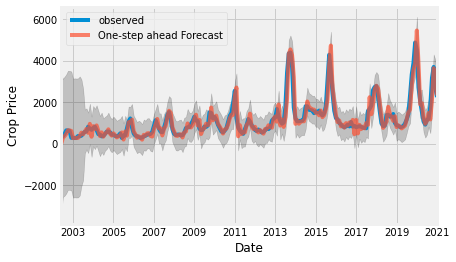

In [29]:
ax = y['2000':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Crop Price')
plt.legend()

plt.show()

In [30]:
y_forecasted = pred.predicted_mean
y_truth = y['2002-06-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 106183.13


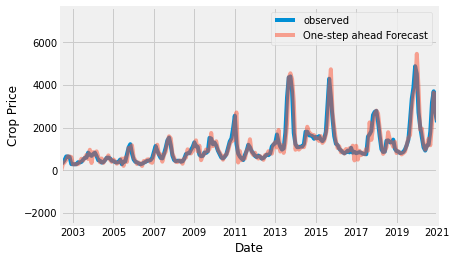

In [47]:
ax = y['2000':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.5)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.3)

ax.set_xlabel('Date')
ax.set_ylabel('Crop Price')
plt.legend()

plt.show()

In [46]:
y_forecasted = pred.predicted_mean
y_truth = y['2002-06-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 106183.13


In [33]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2002-06-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

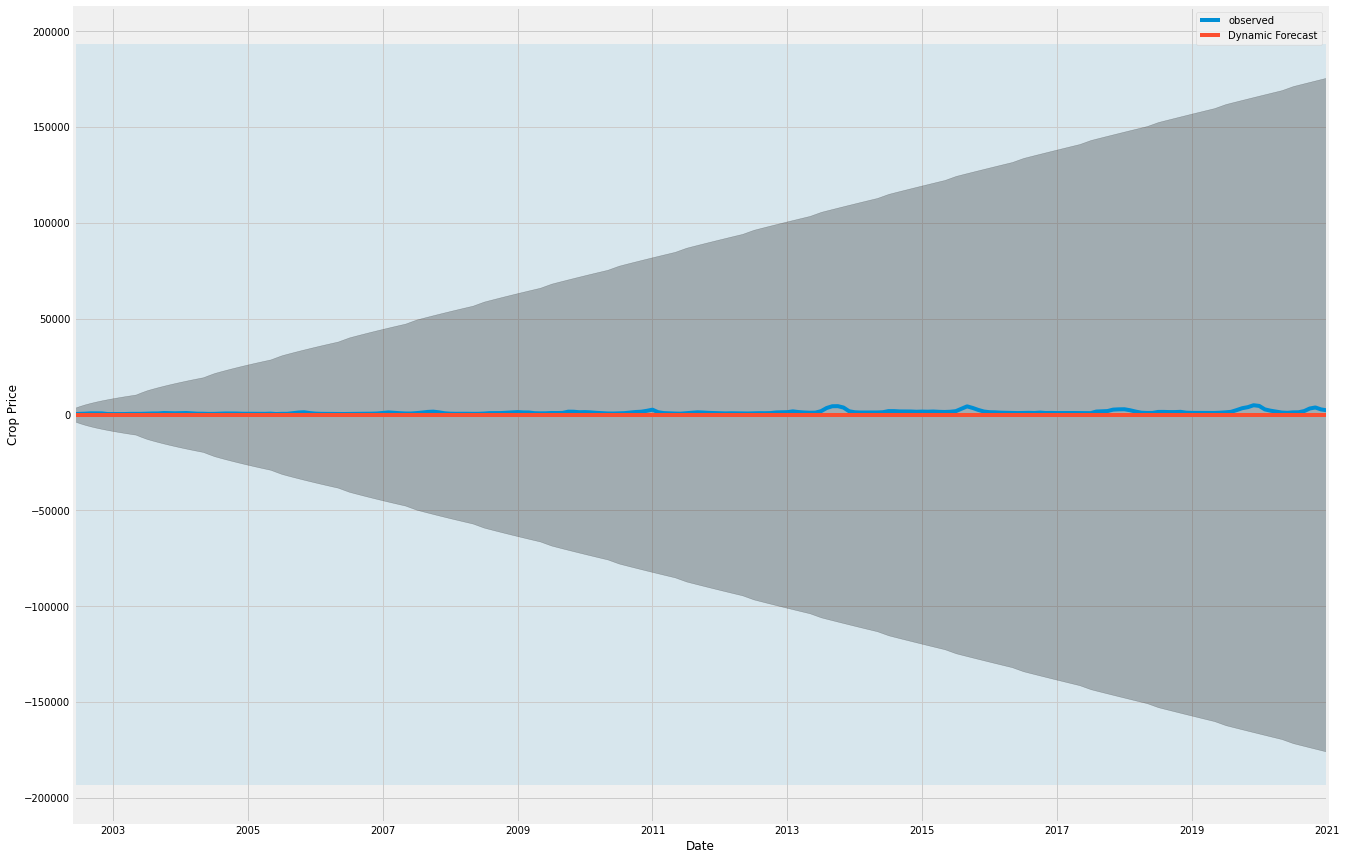

In [48]:
ax = y['2000':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2002-06-01'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Crop Price')

plt.legend()
plt.show()

In [49]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
y_truth = y['2002-06-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 2074657.0


In [50]:
# Get forecast 20 steps ahead in future
pred_uc = results.get_forecast(steps=20)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

In [51]:
pred_ci

,lower Modal Price (Rs./Quintal),upper Modal Price (Rs./Quintal)
2021-02-01,1617.658591,2939.475186
2021-03-01,978.899951,3438.567540
2021-04-01,512.021148,3743.423788
2021-05-01,189.412969,4041.231983
2021-06-01,-57.473410,4327.786674
2021-07-01,-93.713181,4766.465041
2021-08-01,12.352703,5304.308325
2021-09-01,22.576898,5713.536366
2021-10-01,-184.500215,5879.286110
2021-11-01,-453.044525,5961.918691


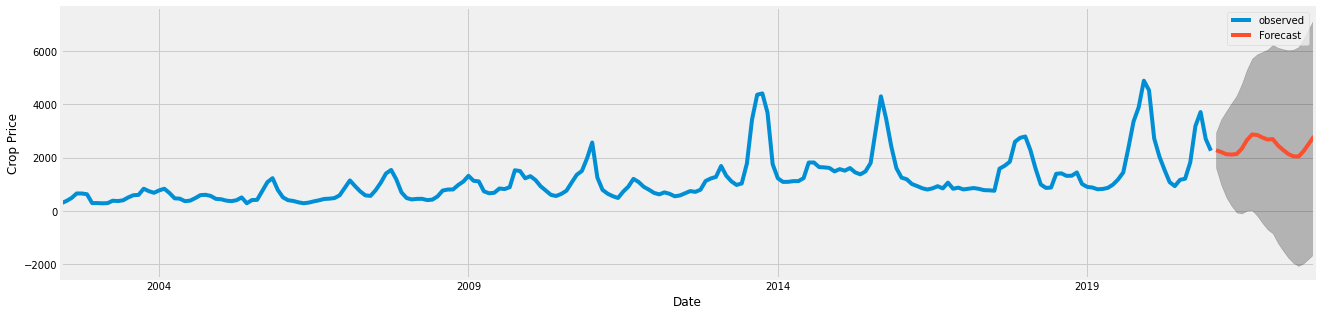

In [52]:
ax = y.plot(label='observed', figsize=(20, 5))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Crop Price')

plt.legend()
plt.show()